In [1]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y, y_pred)
cm

array([[337,  20],
       [ 30, 182]])

* 정확도

In [3]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.9121265377855887

* 정밀도

In [4]:
from sklearn.metrics import precision_score

precision_score(y, y_pred)

0.900990099009901

* 재현율

In [5]:
from sklearn.metrics import recall_score

recall_score(y, y_pred)

0.8584905660377359

* F1 score

In [6]:
from sklearn.metrics import f1_score

f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [7]:
from sklearn.preprocessing import Binarizer


pred_proba = model_lor.predict_proba(X)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=0.1).fit(pred_proba_1)
y_pred2 = binarizer.transform(pred_proba_1)

In [8]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

cm2 = confusion_matrix(y, y_pred2)
print('혼동행렬 : \n',cm2)
print('정확도 :', accuracy_score(y, y_pred2))
print('정밀도 :', precision_score(y, y_pred2))
print('재현율 :', recall_score(y, y_pred2))
print('f1 score :', f1_score(y, y_pred2))

혼동행렬 : 
 [[267  90]
 [  6 206]]
정확도 : 0.8312829525483304
정밀도 : 0.6959459459459459
재현율 : 0.9716981132075472
f1 score : 0.8110236220472441


* ROC 곡선 시각화

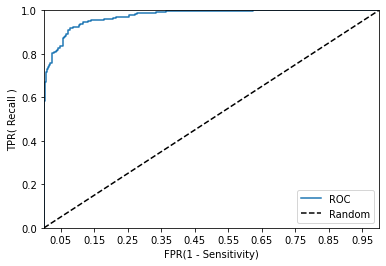

In [12]:
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt 

import numpy as np

def roc_curve_plot(y, pred_proba_c1):
  fprs, tprs, thresholds = roc_curve(y, pred_proba_c1)
  plt.plot(fprs, tprs, label='ROC')
  plt.plot([0, 1], [0, 1], 'k--', label='Random')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  plt.xlim(0, 1); plt.ylim(0, 1)
  plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR( Recall )')
  plt.legend()

roc_curve_plot(y, pred_proba[:, 1])

* ROC AUC 값

In [14]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, pred_proba[:, 1])

0.9741557000158554